Support Vector Machine

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, cross_validate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
data = pd.read_csv(r'C:\Users\iness\OneDrive\Ambiente de Trabalho\FAA_1\diabetes.csv')

# Pre-processing 
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

# Separate the independent (X) and dependent (y) variables
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Separation between training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model 1 - Base (SVM without optimization)
model_svm_base = SVC(random_state=42)
model_svm_base.fit(X_train, y_train)
y_pred_base = model_svm_base.predict(X_test)

report_base = classification_report(y_test, y_pred_base, output_dict=True)
accuracy_svm_base = accuracy_score(y_test, y_pred_base)

In [ ]:
# Model 2 - Optimization with RandomizedSearch
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)
best_model_svm = random_search.best_estimator_
y_pred_optimized = best_model_svm.predict(X_test)

report_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)
accuracy_svm_optimized = accuracy_score(y_test, y_pred_optimized)

In [ ]:
# Model 3 - Cross Validation
cv_results = cross_validate(SVC(), X, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
mean_accuracy_cv = np.mean(cv_results['test_accuracy'])
mean_precision_cv = np.mean(cv_results['test_precision'])
mean_recall_cv = np.mean(cv_results['test_recall'])
mean_f1_cv = np.mean(cv_results['test_f1'])

                    Modelo  Acurácia  Precision (Não-Diabetes)  \
0               SVM (Base)  0.766234                  0.783784   
1          SVM (Otimizado)  0.759740                  0.803922   
2  SVM (Validação Cruzada)  0.760470                  0.753877   

   Recall (Não-Diabetes)  F1-Score (Não-Diabetes)  Precision (Diabetes)  \
0               0.878788                 0.828571              0.720930   
1               0.828283                 0.815920              0.673077   
2               0.477987                 0.580863              0.753877   

   Recall (Diabetes)  F1-Score (Diabetes)  
0           0.563636             0.632653  
1           0.636364             0.654206  
2           0.477987             0.580863  


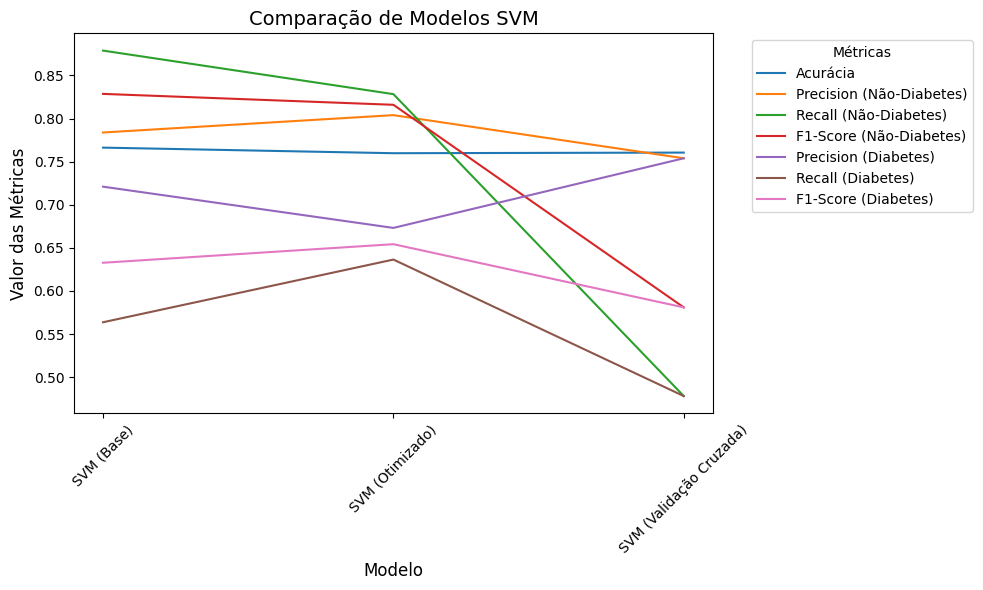

In [ ]:
#  Organize the Results
results = {
    'Modelo': ['SVM (Base)', 'SVM (Otimizado)', 'SVM (Validação Cruzada)'],
    'Acurácia': [accuracy_svm_base, accuracy_svm_optimized, mean_accuracy_cv],
    'Precision (Não-Diabetes)': [report_base['0']['precision'], report_optimized['0']['precision'], mean_precision_cv],
    'Recall (Não-Diabetes)': [report_base['0']['recall'], report_optimized['0']['recall'], mean_recall_cv],
    'F1-Score (Não-Diabetes)': [report_base['0']['f1-score'], report_optimized['0']['f1-score'], mean_f1_cv],
    'Precision (Diabetes)': [report_base['1']['precision'], report_optimized['1']['precision'], mean_precision_cv],
    'Recall (Diabetes)': [report_base['1']['recall'], report_optimized['1']['recall'], mean_recall_cv],
    'F1-Score (Diabetes)': [report_base['1']['f1-score'], report_optimized['1']['f1-score'], mean_f1_cv],
}

# Create DataFrame with the results
results_df = pd.DataFrame(results)

print(results_df)

metrics = ['Acurácia', 'Precision (Não-Diabetes)', 'Recall (Não-Diabetes)', 'F1-Score (Não-Diabetes)', 
           'Precision (Diabetes)', 'Recall (Diabetes)', 'F1-Score (Diabetes)']

plt.figure(figsize=(10, 6))

# Generate the lines for each metric
for metric in metrics:
    plt.plot(results_df['Modelo'], results_df[metric], label=metric)

plt.title('Comparação de Modelos SVM', fontsize=14)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Valor das Métricas', fontsize=12)
plt.legend(title='Métricas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
